# Preprocessing

In [0]:
#Chris only
 #from google.colab import drive
 #drive.mount('/content/drive/')

In [0]:
#cd drive/My\ Drive/ML

In [0]:
import sklearn # general ml package

import numpy as np
import pandas as pd # Pandas module to enable data manipulation
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

# Common imports
import numpy as np # fundamental package for scientific computing
import os # to run file I/O operation 

# to make this notebook's output stable across runs
# any number will do, as long as it is used consistently
np.random.seed(42)
#File link: https://www.virginiaroads.org/datasets/virginia-crashes
#https://www.virginiadot.org/info/2018_traffic_data.asp
#aadt = pd.read_csv("AADT_PrimaryInterstate_2018.csv")
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

In [6]:
crashes = pd.read_csv("Virginia_Crashes.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (45) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
crashes['Driverage'] = crashes['Driverage'].apply(lambda x : str(x).split(',')[0]) #Defines Driver age to be the first one listed, arbitrary but better solution is unclear
crashes['Driverage'].replace('nan', np.nan, inplace = True)
crashes['Driverage'] = crashes['Driverage'].apply(lambda x : float(x))
crashes['Driverage'].replace(np.nan, np.mean(crashes['Driverage']), inplace= True) #replace nans with mean

In [0]:
light = {'2. Daylight': 'Light', '5. Darkness - Road Not Lighted' : 'Dark', '4. Darkness - Road Lighted' : 'Streetlight', '3. Dusk' : 'Twilight', '1. Dawn' : 'Twilight', '6. Darkness - Unknown Road Lighting' : 'Dark', '7. Unknown' : 'Dark'}

In [0]:
crashes['Light_Condition'] = crashes['Light_Condition'].apply(lambda x : light.get(x)) #simplifies light condition -- Chris

In [10]:
pd.get_dummies(crashes['Light_Condition'])

Dark  Light  Streetlight  Twilight
0          0      1            0         0
1          0      1            0         0
2          0      1            0         0
3          0      1            0         0
4          0      0            0         1
...      ...    ...          ...       ...
893658     0      1            0         0
893659     0      0            0         1
893660     0      1            0         0
893661     0      0            1         0
893662     0      0            1         0

[893663 rows x 4 columns]

In [0]:
crashes['Vehiclenumber'] = crashes['Vehiclenumber'].apply(str) #Fixes the float split issue - Arthur

In [0]:
crashes['Vehiclenumber'] = crashes['Vehiclenumber'].apply(lambda x : int(x.split(',')[-1])) #extracts number of vehiclse involved in crash

In [0]:
weather = {'1. No Adverse Condition (Clear/Cloudy)': 'Clear', '5. Rain' : 'Rain', '6. Snow' : 'Snow', '7. Sleet/Hail' : 'Rain',  '4. Mist' : 'Fog', '3. Fog' : 'Fog', '10. Blowing Sand, Soil, Dirt, or Snow' : 'Fog', '8. Smoke/Dust' : 'Fog' , '9. Other' : 'Other', '11. Severe Crosswinds' : 'Other', 'Not Applicable': 'Other'}

In [0]:
crashes['Weather_Condition'] = crashes['Weather_Condition'].apply(lambda x: weather.get(x)) #Simplifies weather

In [15]:
pd.get_dummies(crashes['Weather_Condition'])

Clear  Fog  Other  Rain  Snow
0           1    0      0     0     0
1           1    0      0     0     0
2           1    0      0     0     0
3           1    0      0     0     0
4           1    0      0     0     0
...       ...  ...    ...   ...   ...
893658      1    0      0     0     0
893659      1    0      0     0     0
893660      1    0      0     0     0
893661      1    0      0     0     0
893662      1    0      0     0     0

[893663 rows x 5 columns]

In [0]:
def genderparse(x): #Let gender be binary for this argument, and not provided gender will be 0.5 - Arthur
  gender = str(x).split(',')[0].lower().strip()  #Just take the first gender, implementation bias to be improved upon if a better solution is found
  if(gender == 'male'):
    return 0
  elif(gender == 'female'):
    return 1
  else:
    return 0.5 #Impute with median value, so it impacts both/neither

In [0]:
crashes['Drivergen'] = crashes['Drivergen'].apply(lambda x : genderparse(x)) #Defines Driver gender to be the first one listed, arbitrary but better solution is unclear

In [0]:
def workzoneparse(x): #Returns 0 if not a work zone, 1 if it is - Arthur
  value = int(str(x).split('.')[0])
  if(value==2):
    return 0
  else:
    return 1

In [0]:
crashes['Work_Zone_Related'].unique()

In [0]:
crashes['Work_Zone_Related'] = crashes['Work_Zone_Related'].apply(lambda x: workzoneparse(x)) # - Arthur

In [25]:
crashes['Ped_Nonped'].unique()

array(['NOTPED', 'PED'], dtype=object)

In [0]:
def pedparse(x): #Returns 0 if no pedestrians, 1 otherwise - Arthur
  if(x == 'NOTPED'):
    return 0
  else:
    return 1

In [0]:
crashes['Ped_Nonped'] = crashes['Ped_Nonped'].apply(lambda x: pedparse(x)) # - Arthur

In [27]:
crashes['Deer_Nodeer'].unique()

array([nan, 'DEER'], dtype=object)

In [0]:
def animalparse(x): #Returns 1 if theres an animal, 0 otherwise - Arthur
  if(x == 'ANIMAL'):
    return 1
  else:
    return 0

In [0]:
crashes['Deer_Nodeer'] = crashes['Deer_Nodeer'].apply(lambda x : animalparse(x))

In [31]:
crashes['Distracted_Notdistracted'].unique()

array(['DISTRACTED', nan], dtype=object)

In [0]:
def distractedparse(x): #Returns 1 if the driver was distracted, 0 otherwise - Arthur
  if(x == 'DISTRACTED'):
    return 1
  else:
    return 0

In [0]:
crashes['Distracted_Notdistracted'] = crashes['Distracted_Notdistracted'].apply(lambda x : distractedparse(x))

In [33]:
crashes['Alcohol_Notalcohol'].unique()

array([nan, 'ALCOHOL'], dtype=object)

In [0]:
def alcoholparse(x): #Returns 1 if they've had alcohol, 0 otherwise - Arthur
  if(x == 'ALCOHOL'):
    return 1
  else:
    return 0

In [0]:
crashes['Alcohol_Notalcohol'] = crashes['Alcohol_Notalcohol'].apply(lambda x : alcoholparse(x))

In [39]:
crashes['Speed_Notspeed'].unique()

array([nan, 'SPEED'], dtype=object)

In [0]:
def speedingparse(x): #Returns 1 if speeding, 0 otherwise - Arthur
  if(x == "SPEED"):
    return 1
  else:
    return 0

In [0]:
crashes['Speed_Notspeed'] = crashes['Speed_Notspeed'].apply(lambda x : speedingparse(x))

In [0]:
from datetime import datetime #Encodes the date into the day of the year -1, so ranges from
#0-364 in a normal year, or 0-365 in a leap year

def parsedate(x):
  year, month, daytoparse = str(x).split('-')
  day = daytoparse.split('T')[0]
  thedate = str(day+'-'+month+'-'+year)
  date = datetime.strptime(thedate,"%d-%m-%Y")
  return date.timetuple().tm_yday -1

In [0]:
crashes['Date'] = crashes['Crash_Dt'].apply(lambda x : parsedate(x))

In [44]:
crashes['Roadway_Surface_Cond'].unique() #Unsure of how to handle this

array(['1. Dry', '2. Wet', '4. Icy', '7. Other', '11. Sand, Dirt, Gravel',
       '6. Oil/Other Fluids', '9. Water (Standing, Moving)', '3. Snowy',
       '10. Slush', '5. Muddy', '8. Natural Debris', 'Not Applicable'],
      dtype=object)

In [45]:
crashes['FAC'].unique() #Just Onehot encode

array(['2.Divided, partial control of access', '0.Two-way, non-divided',
       '3.Divided, full control of access',
       '1.Divided, no control of access', nan,
       '4.One-way, part of a one-way system',
       'B.Two-way structure (bridge, tunnel, causeway, etc.',
       '5.Two-way, part of a one-way system', '7.Transition',
       '6.One-way couplet'], dtype=object)

In [46]:
crashes['Fatal_Crashes'].unique() #Label for predicting deaths

array([0, 1])

In [47]:
crashes['Crash_Severity'].unique()

array(['A.Severe Injury', 'PDO.Property Damage Only', 'B.Visible Injury',
       'K.Fatal Injury', 'C.Nonvisible Injury'], dtype=object)

In [0]:
def injuryparse(x): #Creates the label for if a person was injured somewhere in the crash - Arthur
  if(x == "PDO.Property Damage Only"):
    return 0
  else:
    return 1

In [0]:
crashes['IsInjured'] = crashes['Crash_Severity'].apply(lambda x : injuryparse(str(x)))

In [0]:
headers = ['LATITUDE', 'LONGITUDE', 'Alcohol_Notalcohol', 'Carspeedlimit','Date', 'Deer_Nodeer','Distracted_Notdistracted', 'Driverage', 'Drivergen', 'FAC', 'Light_Condition', 'Ped_Nonped', 'Roadway_Surface_Cond', 'Speed_Notspeed', 'Weather_Condition', 'Vehiclenumber', 'Crash_Military_Tm', 'VDOT_District', 'IsInjured', 'Fatal_Crashes']

In [54]:
len(headers)

20

In [0]:
crashes_simplified = crashes[headers] #Subsets the data into only what we want to work with - Arthur

In [0]:
toscaleheaders = ['LATITUDE', 'LONGITUDE', 'Carspeedlimit', 'Date', 'Driverage', 'Vehiclenumber', 'Crash_Military_Tm'] #- Arthur

In [58]:
len(toscaleheaders)

7

In [0]:
toOHEheaders = ['Light_Condition', 'FAC', 'Weather_Condition', 'Roadway_Surface_Cond', 'VDOT_District'] #-Arthur

In [0]:
processedheaders = []
for i in range(len(headers)):
  if(headers[i] not in toscaleheaders and headers[i] not in toOHEheaders):
    processedheaders.append(headers[i])

In [0]:
processedheaders.remove('IsInjured')
processedheaders.remove('Fatal_Crashes')

In [0]:
from sklearn.pipeline import Pipeline #- Arthur
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
num_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy="median")),
            ('std_scaler', StandardScaler()),
])

In [64]:
crashes_simplified.dropna(inplace=True) #Remove datapoints where there isn't a value - Arthur
#NOTE: done because it is hard to handle appropriately what to impute with for things such as road condition, road type, etc.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
for i in range(len(headers)): #Shows where there are null values, there should be nothing printed
  if(crashes_simplified.iloc[i].isnull().values.any()):
    print(headers[i])

In [0]:
#Create the labels afte dropping the NaNs. - Arthur
LabelIsInjured = crashes_simplified['IsInjured']
LabelFatalCrash = crashes_simplified['Fatal_Crashes']
crashes_simplified = crashes_simplified.drop('IsInjured', axis=1)
crashes_simplified = crashes_simplified.drop('Fatal_Crashes', axis=1)

In [0]:
from sklearn.compose import ColumnTransformer # - Arthur

num_attributes = toscaleheaders
cat_attributes = toOHEheaders
binary_attributes = processedheaders
full_pipeline = ColumnTransformer([
                                   ('num', num_pipeline, num_attributes),
                                   ("cat", OneHotEncoder(), cat_attributes),
                                   #('cat', emptypipeline, binary_attributes)
], remainder='passthrough') #Use passthrough since the other data is already processed
crashes_prepared = full_pipeline.fit_transform(crashes_simplified)
#Labels are 'IsInjured' and 'Fatal_Crashes'

In [72]:
crashes_prepared.shape #Correct Shape - total of OHE is 36 over 5 categories, 
#so 36 - 4 + 18 original categories = 50 is the output shape, which is correct - Arthur [5 7 6 8 3 2 1 4 9]

(792861, 52)

In [0]:
# crashes_prepared_dataframe = pd.DataFrame(crashes_prepared, columns=['LATITUDE', 'LONGITUDE', 'Carspeedlimit',
# 'Date', 'Driverage', 'Vehiclenumber', 'Crash_Military_Tm', 'Light', 'Twilight', 'Dark', '0.Two-way, non-divided', '1.Divided, no control of access',
# '7.Transition', '2.Divided, partial control of access', '3.Divided, full control of access', '4.One-way, part of a one-way system',
#  'B.Two-way structure (bridge, tunnel, causeway, etc.', '5.Two-way, part of a one-way system', 'Rain', 'Clear', 'Fog', 'Snow', 'Other Weather',
#   '2. Wet', '1. Dry', '9. Water (Standing, Moving)', '11. Sand, Dirt, Gravel', '4. Icy', '3. Snowy', '10. Slush', '6. Oil/Other Fluids',
#    '7. Other Road Condition', '8. Natural Debris', '5. Muddy', 'District 5', 'District 7', 'District 6', 'District 8', 'District 3', 'District 2',
#    'District 1', ' District 4', ' District 9', 'Alcohol_Notalcohol', 'Deer_Nodeer', 'Distracted_Notdistracted', 'Drivergen', 
#    'Ped_Nonped', 'Speed_Notspeed','Work_Zone_Related'])

In [0]:
#crashes_prepared_dataframe


NameError: ignored

# Analysis and Plotting


## Setup

In [0]:
from matplotlib import pyplot as plt


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
  print("Saving figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

In [0]:
from matplotlib import cm as cm
import matplotlib.image as mpimg

def plotclusters(X, Y, k, model, name):
  virginia_img=mpimg.imread('Virginia-Outline.png')
  plt.imshow(virginia_img, alpha=0.5,
           cmap=plt.get_cmap("jet"), extent=[X[1].min()-3.8, X[1].max()+0.15, X[0].min()-0.525, X[0].max()+1.2])
  colors = cm.rainbow(np.linspace(0, 1, k))
  for classification in range(k):
    c = colors[classification]
    string_label = str('cluster ' + str(classification))
    plt.scatter(X[y_km == classification, 1], X[y_km == classification, 0], 
                color = c, s = 10, alpha = 0.5, label = string_label)
  plt.scatter(model.cluster_centers_[:,1], model.cluster_centers_[:,0], color='k', marker = "*", 
              s= 100, label='centroids')
  #The +7 is from 18-4-7, in case the passthrough option is putting the lat&long after the passthroughs
  plt.legend(scatterpoints=1)
  plt.grid()
  plt.show()
  save_fig(name)
  return

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score # - Ben
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier # - Ben
from sklearn.model_selection import train_test_split, GridSearchCV
import tensorflow_probability as tfp

In [0]:
def createprobabilities(array):
  resultarray = []
  for i in range(len(array)):
    if(array[i]==1):
      resultarray.append([0,1])
    else:
      resultarray.append([1,0])
  return np.asarray(resultarray)

In [0]:
def getnetworkprediction(array):
  result = []
  for i in range(len(array)):
    if(array[i][1]==1):
      result.append(1)
    else:
      result.append(0)
  return np.asarray(result)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(crashes_prepared, np.asarray(LabelIsInjured), random_state=42)
#rnd_clf = RandomForestClassifier(n_estimators=50, random_state=42)
X_train_network, X_val_network, y_train_network, y_val_network = train_test_split(X_train, y_train, random_state=42, train_size = 0.75)

In [0]:
y_train_net_probs = createprobabilities(y_train_network)
y_val_net_probs = createprobabilities(y_val_network)
y_test_net_probs = createprobabilities(y_test)

In [0]:
ignore, counts = np.unique(LabelIsInjured, return_counts=True)
print(counts)

[306140 150145]


## Custom Built Neural Network

Taken from https://pyswarms.readthedocs.io/en/latest/examples/usecases/train_neural_network.html

In [0]:
pip install pyswarms

     |████████████████████████████████| 102kB 2.3MB/s 


In [0]:
import pyswarms as ps

In [0]:
n_inputs = len(X_train[0])
n_hidden = 100
n_classes = 2
num_samples = len(X_train)

In [0]:
def logits_function(p):
  w1b1bound = n_inputs * n_hidden
  b1w2bound = w1b1bound  + n_hidden
  w2b2bound = b1w2bound + n_hidden*n_classes
  b2upper = w2b2bound + n_classes
  W1 = p[0:w1b1bound].reshape((n_inputs, n_hidden))
  b1 = p[w1b1bound:b1w2bound].reshape((n_hidden,))
  W2 = p[b1w2bound:w2b2bound].reshape((n_hidden, n_classes))
  b2 = p[w2b2bound:b2upper].reshape((n_classes))

  z1 = X_train.dot(W1) + b1
  a1 = np.tanh(z1)
  logits = a1.dot(W2) + b2
  return logits

In [0]:
def forward_prop(params):
    logits = logits_function(params)
    # Compute for the softmax of the logits
    exp_scores = np.exp(logits)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    # Compute for the negative log likelihood

    corect_logprobs = -np.log(probs[range(num_samples), y_train])
    loss = np.sum(corect_logprobs) / num_samples

    return loss

In [0]:
def f(x):
    n_particles = x.shape[0]
    j = [forward_prop(x[i]) for i in range(n_particles)]
    return np.array(j)

In [0]:
def predict(pos):
    logits = logits_function(pos)
    y_pred = np.argmax(logits, axis=1)
    return y_pred

In [0]:
# Initialize swarm
options = {'c1': 0.7, 'c2': 0.5, 'w':0.9}

# Call instance of PSO
dimensions = (n_inputs * n_hidden) + (n_hidden * n_classes) + n_hidden + n_classes
optimizer = ps.single.GlobalBestPSO(n_particles=100, dimensions=dimensions, options=options)

# Perform optimization
cost, pos = optimizer.optimize(f, iters=100)

2020-04-25 18:55:18,570 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.7, 'c2': 0.5, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=0.646
2020-04-25 23:00:06,409 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.6461658146921349, best pos: [0.78498977 0.86490995 1.67386447 ... 2.21716216 1.29753062 1.71143523]


In [0]:
y_pred_pso = predict(pos)
(predict(pos) == y_train).mean() #Accuracy

0.6656351453626834

In [0]:
confusion_matrix(y_train, y_pred_pso)

array([[225442,   4196],
       [110228,   2347]])

## Neural Network Work

In [0]:
neuralnet = keras.models.Sequential();
neuralnet.add(keras.layers.Flatten(input_shape=[len(X_train[0])]))
neuralnet.add(keras.layers.Dense(1200, activation='relu'))
neuralnet.add(keras.layers.Dropout(0.3))
neuralnet.add(keras.layers.Dense(900, activation='sigmoid'))
neuralnet.add(keras.layers.Dropout(0.3))
neuralnet.add(keras.layers.Dense(600, activation='relu'))

neuralnet.add(keras.layers.Dropout(0.3))
neuralnet.add(keras.layers.Dense(450, activation='sigmoid'))
neuralnet.add(keras.layers.Dropout(0.5))
neuralnet.add(keras.layers.Dense(200, activation='relu'))


neuralnet.add(keras.layers.Dropout(0.5))
neuralnet.add(keras.layers.Dense(120, activation='sigmoid'))

neuralnet.add(keras.layers.Dropout(0.5))
neuralnet.add(keras.layers.Dense(70, activation='relu'))

neuralnet.add(keras.layers.Dense(2, activation="sigmoid"))
neuralnet.add(keras.layers.Reshape([2]))

In [0]:
# neuralnet.compile(loss='binary_crossentropy',
#                   optimizer=keras.optimizers.Adam(learning_rate = 0.0005, beta_1 = 0.65, beta_2=0.95, amsgrad=True), 
#                   metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision()])
# neuralnet.compile(loss='binary_crossentropy',
#                   optimizer=tfp.optimizer.differential_evolution_one_step(keras.losses.BinaryCrossentropy(), crashes_prepared ), 
#                   metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision()])
# neuralnet.compile(loss='binary_crossentropy',
#                   optimizer=keras.optimizers.Adagrad(), 
#                   metrics=['accuracy', keras.metrics.Recall(), keras.metrics.Precision()])

In [0]:
history = neuralnet.fit(X_train_network, y_train_net_probs, 
                        validation_data=(X_val_network, y_val_net_probs), batch_size= 80, epochs=3)

Epoch 1/3
3209/3209 [==============================] - 131s 41ms/step - loss: 0.6397 - accuracy: 0.6710 - recall_5: 0.6709 - precision_5: 0.6701 - val_loss: 0.6344 - val_accuracy: 0.6711 - val_recall_5: 0.6711 - val_precision_5: 0.6711
Epoch 2/3
3209/3209 [==============================] - 134s 42ms/step - loss: 0.6386 - accuracy: 0.6710 - recall_5: 0.6712 - precision_5: 0.6707 - val_loss: 0.6343 - val_accuracy: 0.6711 - val_recall_5: 0.6711 - val_precision_5: 0.6711
Epoch 3/3
3209/3209 [==============================] - 131s 41ms/step - loss: 0.6379 - accuracy: 0.6710 - recall_5: 0.6711 - precision_5: 0.6708 - val_loss: 0.6342 - val_accuracy: 0.6711 - val_recall_5: 0.6711 - val_precision_5: 0.6711


In [0]:
neuralnet.evaluate(X_test, y_test_net_probs)

3565/3565 [==============================] - 22s 6ms/step - loss: 0.6345 - accuracy: 0.6706 - recall_5: 0.6706 - precision_5: 0.6706


[0.6344537734985352, 0.670646607875824, 0.670646607875824, 0.670646607875824]

In [0]:
y_pred_network_prob = neuralnet.predict(X_test)

In [0]:
def getrealresults(array, threshold):
  toret = []
  for i in range(len(array)):
    if(array[i][1] >= threshold):
      toret.append(1)
    else:
      toret.append(0)
  return np.asarray(toret)

In [0]:
#y_pred_network = np.argmax(y_pred_network_prob, axis= 1) 
#Since the classes are the indexes, just get the max value's column index per row
y_pred_network = getrealresults(y_pred_network_prob, 0.5)

In [0]:
auc = roc_auc_score(y_test, y_pred_network)
print(auc)

0.5


In [0]:
confusion_matrix(y_test,y_pred_network)

array([[76502,     0],
       [37570,     0]])

In [0]:
print("Recall: " + str(recall_score(y_test, y_pred_network)))
print("Precision: " + str(precision_score(y_test, y_pred_network)))
print("Accuracy: " + str(accuracy_score(y_test, y_pred_network)))

Recall: 0.6854763022055373
Precision: 0.41507423456702425
Accuracy: 0.5780215531822356


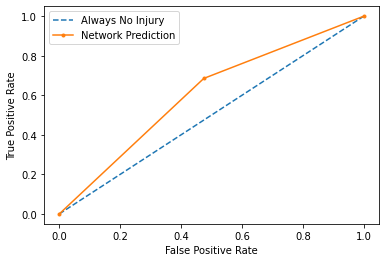

In [0]:
#Plots the ROC curve
blank_probs = [0 for _ in range(len(y_test))]
blank_fpr, blank_tpr, _ = roc_curve(y_test, blank_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test, y_pred_network)
plt.plot(blank_fpr, blank_tpr, label = 'Always No Injury', linestyle='--')
plt.plot(nn_fpr, nn_tpr, label='Network Prediction', marker = '.')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [0]:
# #Doen't work yet due to out-of-date wrapper for SKLearn, but will be updated within a few months hopefully:
# #https://github.com/tensorflow/tensorflow/pull/37201
# def create_model():
#   gridneuralnetmodel = keras.models.Sequential();
#   gridneuralnetmodel.add(keras.layers.Flatten(input_shape=[len(X_train[0])]))
#   gridneuralnetmodel.add(keras.layers.Dense(320))
#   gridneuralnetmodel.add(keras.layers.ReLU())
#   gridneuralnetmodel.add(keras.layers.Dropout(0.5))
#   gridneuralnetmodel.add(keras.layers.Dense(200))
#   gridneuralnetmodel.add(keras.layers.ReLU())
#   gridneuralnetmodel.add(keras.layers.Dropout(0.5))
#   gridneuralnetmodel.add(keras.layers.Dense(120))
#   gridneuralnetmodel.add(keras.layers.ReLU())
#   gridneuralnetmodel.add(keras.layers.Dropout(0.5))
#   gridneuralnetmodel.add(keras.layers.Dense(70))
#   gridneuralnetmodel.add(keras.layers.ReLU())
#   gridneuralnetmodel.add(keras.layers.Dense(2, activation="sigmoid"))
#   gridneuralnetmodel.add(keras.layers.Reshape([2]))
#   return gridneuralnetmodel
# gridNN = keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model())
# parametersNN =  [
#   {'batch_size' : [10, 20, 40, 60, 80, 100]},
# ]
# grid = GridSearchCV(estimator=gridNN, param_grid=parametersNN, n_jobs = -1, cv = 3)
# grid_result = grid.fit(X_train, createprobabilities(y_train))

## Clustering Work

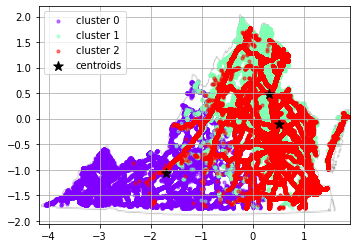

Saving figure 3-Means


<Figure size 432x288 with 0 Axes>

In [0]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, n_jobs = -1, random_state=42)
km.fit(crashes_prepared)
y_km = km.fit_predict(crashes_prepared)
plotclusters(crashes_prepared, y_km, 3, km, "3-Means")

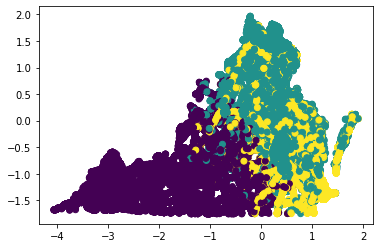

In [0]:
plt.scatter(crashes_prepared[:, 1], crashes_prepared[:, 0], c=y_km)

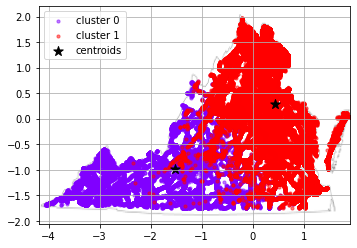

Saving figure 2-Means


<Figure size 432x288 with 0 Axes>

In [0]:
km = KMeans(n_clusters=2, n_jobs = -1, random_state=42)
km.fit(crashes_prepared)
y_km = km.fit_predict(crashes_prepared)
plotclusters(crashes_prepared, y_km, 2, km, "2-Means")

In [73]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
for i in range(1, 20):
    km = KMeans(n_clusters=i, n_jobs = -1, random_state=42)
    km.fit(crashes_prepared)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 20), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()
save_fig("K-Means Elbow Curve")

ValueError: ignored

## Classification Work


In [0]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(random_state=42)
decisiontree.fit(X_train, y_train)
y_dtp = decisiontree.predict(X_test)

In [0]:
from sklearn.model_selection import cross_val_score
scores_dt = cross_val_score(decisiontree, X_train, y_train, cv=5)

KeyboardInterrupt: ignored

In [0]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_dt.mean(), scores_dt.std() * 2))
print('Decision Tree Confusion Matrix\n', confusion_matrix(y_test, y_dtp), "\n")
print('Decision Tree Accuracy\n', accuracy_score(y_test, y_dtp))
print('Decision Tree Precision\n', precision_score(y_test, y_dtp))
print('Decision Tree Recall\n', recall_score(y_test, y_dtp))

In [0]:
# from sklearn.model_selection import GridSearchCV
# params_dt = {
    
# }

# grid_dt = GridSearchCV(decisiontree, cv = 3, parameters = params_dt, n_jobs=-1)

In [0]:
LabelIsInjured.value_counts()

In [0]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats
param_dist = {
              "max_features": stats.randint(0, 100), #[3, 6, 8, 10, 20, 25, 28, 30, 33, 35, 37, 40, 60, 80, 100],
              "min_samples_leaf": stats.randint(2, 10000), #[5,10,20,50,100, 300, 700, 900, 1300, 1800, 2700, 5000, 8000, 
                                   #10000, 20000, 30000, 40000, 70000],
              }
random_dt = RandomizedSearchCV(cv=5, n_jobs=-1, pre_dispatch=3, 
                               estimator=decisiontree, 
                               n_iter = 1000, scoring='recall', #scoring='neg_brier_score', #scoring='f1',
                               param_distributions = param_dist)

In [0]:
random_dt.fit(X_train, y_train)

In [0]:
y_rdt = random_dt.predict(X_test)

In [0]:
#Want to maximize recall over precision, since over-abundance of caution is better than not enough
print('Decision Tree Confusion Matrix\n', confusion_matrix(y_test, y_rdt), "\n")
print('Decision Tree Accuracy\n', accuracy_score(y_test, y_rdt))
print('Decision Tree Precision\n', precision_score(y_test, y_rdt))
print('Decision Tree Recall\n', recall_score(y_test, y_rdt))

In [0]:
random_dt.best_params_

In [0]:
crashes_prepared_dataframe.shape

In [0]:
X_train.shape

In [0]:
LabelFatalCrash.shape

In [0]:
#rnd_clf.fit(X_train, y_train)
#y_pred = rnd_clf.predict(X_test)
#print('random forest death prediction\n', confusion_matrix(y_test, y_pred))

In [0]:
print('SVM RBF\n', confusion_matrix(y_test, y_pred), "\n")
print('SVM RBF Accuracy\n', accuracy_score(y_test, y_pred))
print('SVM RBF Precision\n', precision_score(y_test, y_pred))
print('SVM RBF Recall\n', recall_score(y_test, y_pred))

In [0]:
def plot_svm(X, y, name, model, ax=None):
    ax = ax or plt.gca()
    ax.scatter(X[:, 1], X[:, 0], c=y, s=50, cmap='rainbow')
    plot_svc_decision_function(model, ax)
    save_fig(name)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [0]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# parameters = {
#     'C' : [0.0001, 0.01, 1, 5],
# }

rbfsvm = SVC(kernel='rbf')
rbfsvm.fit(X_train, y_train)
y_pred = rbfsvm.predict(X_test)

# search = GridSearchCV(rbfsvm, parameters)
# search.fit(X_train, y_train)
# svm_predict = search.predict(X_test)

In [0]:
#plot_svm(X_test, y_test, name="RBF Fatality Plot", model=rbfsvm)